# <center> Mathematical & Statistical Techniques - Part I - Problem Set 3

### <center> Reza Pourkhodabakhshi
<center> Project's Supervisor : Prof. Lluis Garrido

The Standard Model of particle physics predicts the existence of the Higgs that couples to the other particles with a strength proportional to their masses. Its discovery has been very difficult because its mass is not determined by the model and its production rate is very small in front of a huge background. In this excercise, we will reproduce the claim of its discovery by the experuments ATLAS and CMS at CERN. 
Assume: 
- m (higgs) = 126.5 GeV
- only its decay to a pair of photons

For the distribution of the invariant mass of the reconstructed pair of photons is going to be the following simple model: 

## SIGNAL generation:
Gaussian distributionn $N(m_{γγ}; 126.5, 2^2)$ corresponding to a decay $H → γγ$ centred at its mass of 126.5 GeV and with a standard deviation of 2 GeV dominated by the experimental resolution of the measurement of $m_{γγ}$. Assume: production rate of 400 events/year

We use a toy model where we assume a signal that follows a Gaussian distribution $N(m_{\gamma\gamma};126.5,2^2)$ centered at 126.5 GeV and standard deviation of 2 GeV. We assume a production rate of a Higgs boson of 400 events per year.

## BACKROUND generation:
A decreasing exponential background $C\; e^{- α\; m_{γγ}}$ with parameter $α = 0.0218 \;GeV^{-1}$ and $C$ a normalization constant, corresponding to pairs of photons produced independently. Assume: production rate of 80000 events/year in the mass window 100 GeV ≤ $m_{γγ}$ ≤ 140 GeV. 

__Null hypothesis:__  We define our null hypothesis $H_0$ as a No-detection of the Higgs boson, so the measured (in this case, generated) data should follow the exponential distribution of the backround signal acording to $H_0$.

The p-value of our null hypothesis will quantify the statistical significance of the discovery of the Higgs boson. 

# 1. For one year of data taking, considering only the mass window $\newline$100 GeV ≤ $m_{γγ}$ ≤ 140 GeV. 
- Generate signal and background events as function of $m_{γγ}$.
- Build a $\chi^2$ estimator that tests whether data follows the null hypothesis. Obtain its p-value sampling distribution for many one-year experiments. 
- Defining the __expected significance__ as the expectation value of the p-value of the null hypothesis, what is the expected significance after one year of data taking?

## 1. 1. Generation of signal and backround data


The signal and background events are produced as function of $m_{γγ}$ for a period of time of a year. 

The previously described signal and backround data are generated. They are later put together in a single set of data.$\newline$

We present histograms of the signal, backround, and the full set of data and the backround together. In this last histogram, it is easy to see a peak around $m_{\gamma\gamma}=126.5$ GeV which corresponds to the Higgs production events.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import truncexpon 
from scipy.stats import chi2

In [7]:
#Production rate of events per year 
PR_signal = 400 #events x year
PR_background = 80000 #events x year

N = 150 #nº of bins
α = 0.0218 #[1/GeV]
mu = 126.5 #mean [GeV]
sigma = 2 #standard deviation [GeV]

# Generating the SIGNAL events as a function of mγγ:
signal = np.random.normal(mu, sigma, PR_signal)
# Generating a BACKGROUND events as a function of mγγ:
background = truncexpon.rvs(b=(140-100)*α, loc=100, scale=1/α, size=PR_background)

#instead of an exponential, to get the events in that range if not is really hard

#Adding both to the same array
sig_back = []
for i in range(signal.size): 
    sig_back.append(signal[i])
for i in range(background.size):
    sig_back.append(background[i])

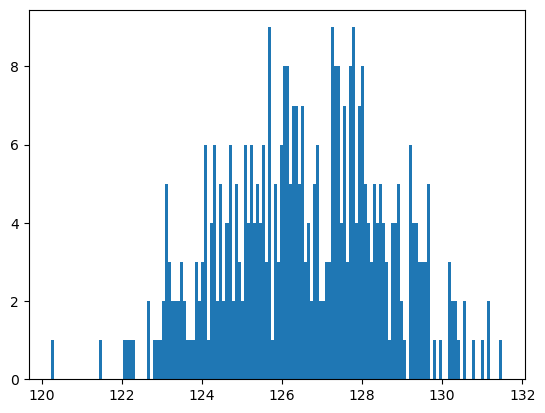

In [8]:
plt.hist(signal, bins= N); #SIGNAL HISTOGRAM

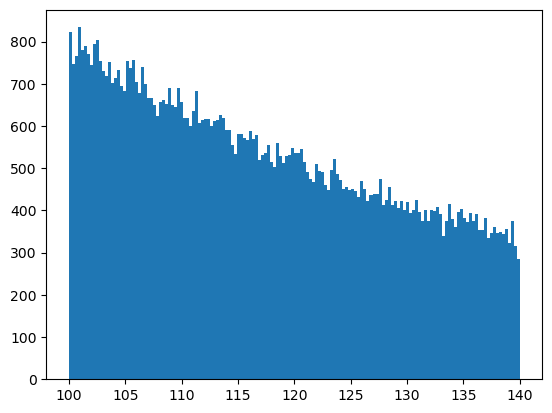

In [9]:
plt.hist(background, bins= N); #BACKGROUND HISTOGRAM

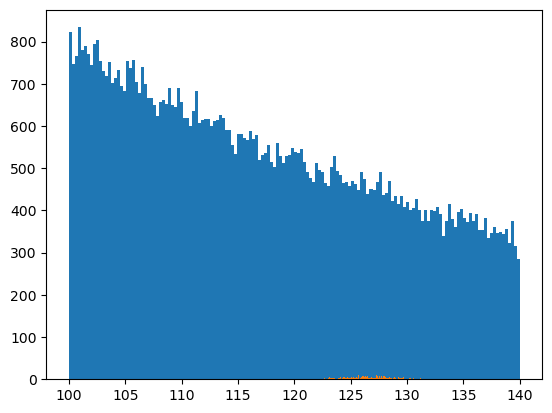

In [11]:
plt.hist(sig_back, bins = N); #TOTAL HISTOGRAM
plt.hist(signal, bins= N); #SIGNAL SECTION INSIDE THE SUM OF BOTH [ORANGE]

#  

#  

# 1.2. Rejectance of the null hypothesis:
## 1.2.1 p-value calculation through $\chi^2$ estimator
We calculate the p-value of our set of generated data with respect to the exponential backround distribution (which is the null hypothesis).

### Building a $\chi^2$ estimator that tests whether the data follows the null hypothesis
    + obtaining its p-value sampling distribution for many one-year experiments
    
The purpose of the p-value is to check that the data follows the __null hypothesis.__

In [16]:
# Binning the generated events with a histogram
obs_e = np.histogram(sig_back, bins = N)[0]

# Computing the expected events for each bin

delta = 40/N # Space between bins
C = 1/3.0173 #normalization constant

#Generating the background distribution CDF as the PDF of the null hypothesis

def CDF(x): 
    return(C/α)*(1-np.exp(-α*x))

# plus, calculate the expected events per bin
exp_e = []
for i in range (N):
    x = 100 + i * delta
    y = (CDF(x+delta)-CDF(x))*PR_background
    exp_e.append(y)
    
# computing the observed \chi^2 estimator value and the p-value: 
chi_2_obs = 0
for i in range(N): 
    chi_2_obs += (obs_e[i]-exp_e[i])**2/exp_e[i]

pval = 1-chi2.cdf(chi_2_obs, (N-1))
                                     
print("The chi^2 for the observed events:", chi_2_obs)
print("The p-value for the observed events:", pval)

The chi^2 for the observed events: 147.30753534998357
The p-value for the observed events: 0.5238216475617509


## 1.2.2 Distribution of the p-values
We repeat this procedure several times ($N_{\textrm{samples}}=1000$), which corresponds to having $N_\textrm{samples}$ samples of 1-year experimental data-taking. We plot their distribution.

If the null hypothesis $H_0$ were true, the distribution of the p-values for the multiple 1-year samples would be flat. As is is shown, this distribution is completely shifted to lower values, which is a clear indicative that the null hypothesis is incorrect; there has been detection of the Higgs boson.

In [17]:
# Computing the p-value sampling distribution for many 1-year experiments
exp_e = []
n = 1000 #nº of times repeated the experiment

# Generating 1000 signal and background events and for each the \chi^2 and the p-value is calculated 
for i in range(n): 
    x = 100 + i*delta
    y = (CDF(x+delta)-CDF(x))*PR_background
    exp_e.append(y)

pvalue = []
for j in range(n):
    tot=[]
    signal = np.random.normal(mu, sigma, PR_signal)
    background = truncexpon.rvs(b=(140-100)*α, loc=100, scale=1/α, size=PR_background)
    
    for i in range(PR_signal):
        tot.append(signal[i])
    for i in range(PR_background):
        tot.append(background[i])
    obs_e = np.histogram(tot, bins = N)[0]
    
    chi_2_obs=0
    for i in range (N): 
        chi_2_obs += (obs_e[i]-exp_e[i])**2/exp_e[i]
    # the P-value for each experiment
    pval_experiment = 1 - chi2.cdf(chi_2_obs, (N-1)) 
    pvalue.append(pval_experiment)

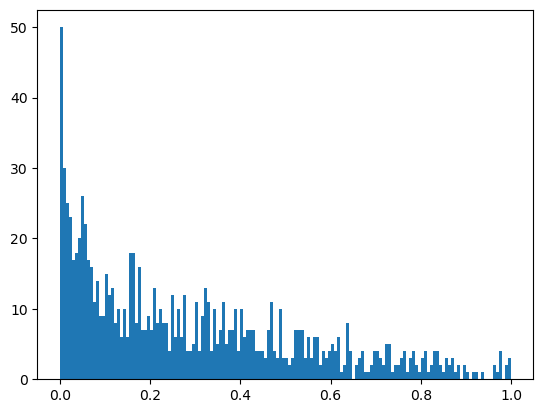

In [18]:
plt.hist(pvalue, bins = N); #Histogram with the P-values of 1000 events

# 1.3. Expected significance for the first year of data-taking
We define the $\textbf{expected significance}$ as the expectation value of the p-value of the null hypothesis $H_0$:
$$ExpSig=E[p-value]=\frac{1}{N_\textrm{samples}}\sum_{i=1}^{N_\textrm{samples}} (p-value)_i$$

We can calculate the expected significance $ExpSig$ after 1 year of data taking. Its value is presented below.

For a __TRUE__ null hypothesis the p-value expected value is 0.5 not mattering the how much data is in the sample. However, if its __FALSE__ the p-value tends to lower values (lower than 0.5), while starts being dependent on the size of the dataset. 

In [19]:
# Doing the mean of the 1000 p-values generated above to compute the expected significance
mean_pvalue = sum(pvalue)/len(pvalue)
print('The expected significance after a year of data taking is', mean_pvalue)

The expected significance after a year of data taking is 0.2877310011304912


#  

#  

# 2. Expected Significance at a confidence level of $5\sigma$
Since each year the amount of data for each sample of the experiment increases by the ratio at which signal and background events are produced, the distribution of the p-value keeps getting more and more shifted to lower values; the confidence with which we can discard the null hypothesis $H_0$ and confirm the existence of the Higgs boson rises the more data we collect.

We can compute the expected significance for every extra year of data-taking, until we cross the threshold of the $5\sigma$ confidence level, that is $ExpSig< 2.9\cdot 10^{-7}$.$\newline$
By doing so, we conclude that after 15 years of data-taking, we can confirm the existence of the Higgs (discard the null hypothesis) with a confidence level of $5\sigma$.

###### $\bullet$ Assuming that the amount of data to analyse is just proportional to the time used to collect the data, how many years of data do we need for the expected significance to be at the level 5σ that is, < 2.9 10^-7?

To be able to minimize the expected significance there is need to increase the dataset size, which will be done by increasing the years of sampling. 


To compute the number or years of sampling needed so the expected significance at a level of 5σ that is, < $2.9\; 10^-7$ the mean of 1000 experiments will be calculated

In [20]:
n_exp = 1000
yrs = 0
p_val_mean = 1
pval_percent=[]
pval_mean=[]

while p_val_mean > 0.00000029:
    yrs += 1
    pval_prob = 0
    p_val_mean = 0
    for j in range(n_exp):
        TOT=[]
        background=truncexpon.rvs(b=(140-100)*α, loc=100, scale=1/α, size=PR_background *yrs) 
        signal=np.random.normal(mu, sigma, PR_signal *yrs) 
        for i in range(PR_signal *yrs):
            TOT.append(signal[i])  
        for i in range(PR_background *yrs):
            TOT.append(background[i])  
        observed_events = np.histogram(TOT, bins=N)[0]
    
        background_expectevents=[]
        for i in range(N):
            x = 100 + i*delta
            y = (CDF(x+delta) - CDF(x))*(PR_signal + PR_background) *yrs
            background_expectevents.append(y)
    
        chi_2_obs=0
        for i in range(N):
            chi_2_obs += (observed_events[i] - background_expectevents[i])**2 / background_expectevents[i] 
        pval_ex = 1-chi2.cdf(chi_2_obs,(N-1)) 
        
        if pval_ex < 0.00000029:
            pval_prob += 1/n_exp
        p_val_mean += pval_ex/n_exp
      
    pval_mean.append(p_val_mean)
    pval_percent.append(pval_prob *100)   

print("After", yrs, "years, the expected significance at the level of 5σ is achieved." )
print("After", yrs,"years the p-value is", p_val_mean )

After 15 years, the expected significance at the level of 5σ is achieved.
After 15 years the p-value is 5.978132596029524e-08


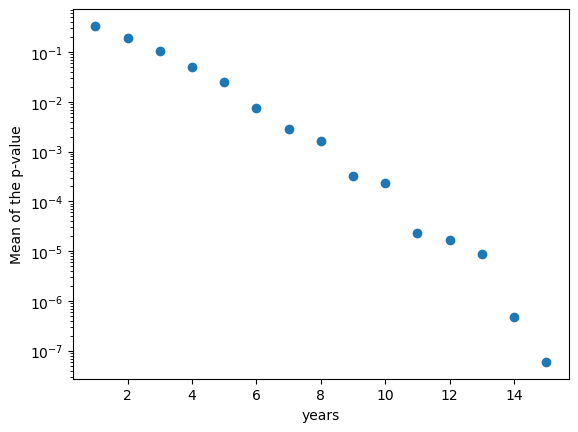

In [25]:
x = [item for item in range (1, yrs+1)]
plt.xlabel('years')
plt.yscale('log')
plt.ylabel('Mean of the p-value')
plt.scatter(x,pval_mean);

#  

# 3. How many years of data do we need in order to have a 95% probability of the p-value being at the level of that is, < 2.9 10^-7?

In [30]:
x = [item for item in range (1, yrs+1)]
year = 0
Pvalue = 0
while Pvalue<95:
    year += 1
    Pvalue = pval_percent[year-1]
print("To have a 95% probability of the p-value being at the level of 5σ we need to wait", year, "years with a probability of :              "+str(x)+"%")

To have a 95% probability of the p-value being at the level of 5σ we need to wait 14 years with a probability of :              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]%


#   

# 4. The above test is a toy model, while the test used in the paper "$\textit{Phys.Lett B716 (2012) 1-29}$" is much more sophisticated. Provide a short review and comparision of the methodology used in the paper. 

$\color{purple}{\textbf{A short summary of the original paper: Versus Toy Model  }}$


- It is interesting that both methods are based on Monte Carlo simulation. Yet, it has some deviations from each other; The sample generated are not simulated directly from a normal or uniform distribution via using inverse transform method. The generated samples are taking into normalization via  unique methods! This is because that samples are required to fully cover the Experiment.

- In agreement with our method, the expected background is fully simulated using MC methods. However, the difference is that the existence of a selection efficiency makes it more complicated and they figured out some way to overcome this problem. Yet, it seems that ultimately a data analysis is required on the data obtained from experiments and afterwards, data fitting is required in order to verify the sample selection

- As stated before, there are modifications on model which affects the significance level of a particular objected particle. Although, removing unnecessary contributions will usually help to estimate values simultaneously; because otherwise, one needs to include the overlapping effects of simulations on each other. As a correlation, it may give rise to a very serious difficulty using this method.

- As we see, the uncertainties was not part of our simulations.

- While we assumed the invariant mass of two photons as a constant $C$ in the exponential background; here they calculate the contribution.

- The mass range is 20 GeV wider. Also, the background is fit to mass spectrum calculated before.
       
- Calorimeter has an energy resolution which is not considered in our model. All in all, experiments calibration was not of our interest.

- While exclusion limits are similar to our simulations; some other factors like fluctuations was not considered in our assignment.

- similarity of using likelihood method to probe statistics is interesting. Yet, here, they used Poisson probability!
        
# $\color{purple}{\textbf{Comparison:  }}$

Both the toy model and the paper's experiment are based on a null hypothesis of non-detection of any signal besides the background noise. In the toy model, the distribution of p-values is used to reject the null hypothesis, while in the paper, $\color{blue}{\textbf{the global signal strength factor}}$ ($\mu$) is studied to reject the null hypothesis. Both approaches aim to detect a signal by comparing the observed data to the expected background.

There are several similarities between the toy model and the paper's experiment. Both discuss the significance level of the result, which is commonly set at 5σ (standard deviations). Both also consider the possibility of the observed excess being a statistical fluctuation of the background. Additionally, both the toy model and the paper analyze the shape of the data, with the paper showing a graph with an exponentially decreasing background and a peak resembling a Gaussian shape. In both, the paper and the toy model, we use Monte Carlo simulatio, Likelihood method, Signal and Background, and p-value to reject Null Hypothesis.  

However, there are some differences between the toy model and the paper's experiment. The paper's experiment involves a more sophisticated statistical analysis, considering the global signal strength factor and using a full likelihood fit that includes systematic uncertainties and correlations. The event generation and background modeling in the paper are also more detailed, using Monte Carlo simulation and event generators like PYTHIA and HERWIG. The paper's experiment also considers additional decay channels for the Higgs boson, while the toy model focuses on the $H \rightarrow \gamma \gamma$ channel.

The description of the ATLAS detector and the data selection process in the the original paper provides additional technical details about the experimental setup and analysis. The ATLAS detector is described as a multipurpose particle physics apparatus with various components for tracking, calorimetry, and particle identification. The data selection involves triggers based on single-lepton or dilepton events, and specific requirements are set for the transverse momenta ($p_{\mathrm{T}}$) and pseudorapidity ($\eta$) ranges of electrons and muons.

The estimation of background yield and composition is done using Monte Carlo simulation and control regions from data. Uncertainties on integrated luminosities and mass resolutions are also considered. The statistical analysis of the data involves constructing a binned likelihood function and applying Poisson probability terms.

Overall, while the toy model provides a simplified representation of the statistical analysis used in the paper's experiment, it lacks the complexity and realism of the actual scientific study. The paper's experiment takes into account various sources of uncertainty, systematic effects, and correlations, which are essential for a rigorous analysis of experimental data.
    
    
Furthermore, the paper's experiment relies on the use of the ATLAS detector, a sophisticated apparatus specifically designed for high-energy particle physics experiments. The detector's components work together to measure various properties of particles produced in proton-proton collisions accurately. This level of experimental detail is not captured in the toy model.

Additionally, the data selection process described in the ATLAS paper demonstrates the careful criteria and triggers used to identify specific events of interest. By setting requirements on the transverse momenta and pseudorapidities of electrons and muons, the researchers aim to select events that are most likely to contain signals of the Higgs boson.

The estimation of the background yield and composition is a crucial aspect of the paper's experiment. The researchers employ Monte Carlo simulations and control regions from data to accurately estimate the expected background contributions. This step helps to distinguish any potential signal from the background noise and evaluate its significance.

The statistical analysis in the paper involves constructing a binned likelihood function, which incorporates the observed data, the expected background contributions, and the uncertainties associated with both. By comparing the likelihood of different signal strength factors ($\mu$) using the profile likelihood ratio, the researchers can extract information about the presence of a Higgs boson signal.
    
    
$\color{purple}{\textbf{Conclusion:  }}$

In summary, while the toy model provides a simplified understanding of the statistical analysis used in the paper's experiment, it fails to capture the complexity, detail, and realism necessary for a comprehensive scientific study. The paper's experiment utilizes advanced techniques, such as the ATLAS detector, sophisticated event generators and simulations, and a detailed statistical considerations, to provide robust evidence for the discovery of the Higgs boson.

Their statistical procedure was based on the global signal strength factor (mu) which operates as a scale factor on the total number of events predicted by the Standard Model for the Higgs boson signal. They defined the strength factor as if equals zero it corresponds to the background-only hypothesis when equaling zero, however, if it equals 1 it corresponds to both, the SM Higgs boson signal plus the background. Moreover, they tested the hypothesised values of mu with a statistic Landa (mu) based on the profile likelihood ratio. The test extracted the information on the signal strength from a full likelihood fit to the data. This likelihood function includes all the parameters that describe the systematic uncertainty and their correlations.

Another aspect that they treated differently in their investigation was the generation of the signal and the background. They modelled the data more accurately with an event generator with processes based on samples of Monte Carlo (MC) simulated events. To do so they used several different programs such as PYTHIA or HERWIG. To conclude, their research resulted to provided conclusive evidence for the discovery of a new particle of mass 126+-0.4 GeV. However, even if the results supported the Higgs boson hypothesis, further research was needed to assess its exact nature.

Both our toy model and the paper's experiment talk about significance level of the result, being this always at the level of $5\sigma$. 

The paper also takes into acount the fact that at first instance, the excess of data that we interpret as a signal of a Higgs production and decay could just be a statistic fluctuation of the background, with probability $p_0$.

Even though the method used in the paper is much more sofisticated, we see plenty of conceptually analogous analysis and results. In fact, looking at, for example, page 10 of the paper, we see a graph where we can clearly distinguish an exponentially decreasing background and a shape-liked peak resembling a gaussian.

Even though other decaying channels are considered in the paper, the main chanel of production is $H\rightarrow \gamma \gamma$ both for the paper and our model.

# 

# $\color{red}{\text{__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __}}$

# $\color{orange}{Appendix. 1}$

Since the plot presented in the main treatment works with bigger data, and it shows a tiny peak at _126 GeV_ ;

Here, we represent another way to generate ___Signal___ and ___Background___ that while it is not as big as the main treatment for generating data, it shows more clearly and apparently that the peak in the last histogram is around $m_{\gamma \gamma} \approx$ ___126.5 GeV___ as Higgs production events.

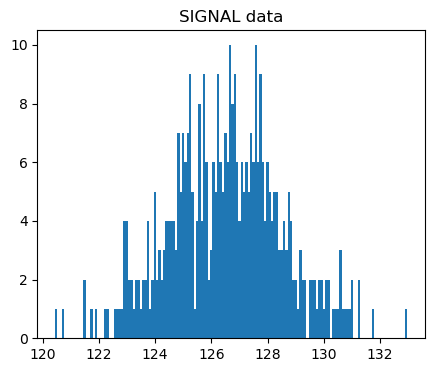

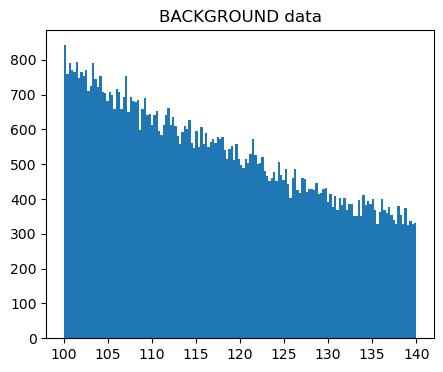

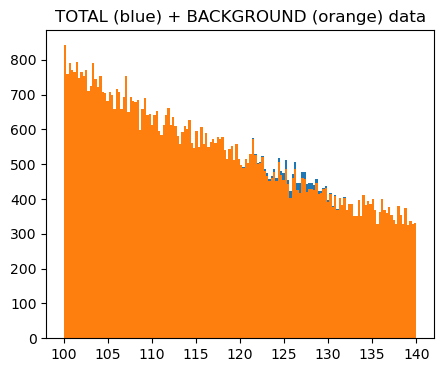

In [36]:
import scipy.stats as scp
import matplotlib.pylab as plt
import numpy as np

#Null hypoth Ho: the higgs follows the backround distrib. b=C*exp[-a*m]
bins=150
mh=126.5
m_min=100
m_max=140
sd=2
Ns=400
Nb=80000
a=0.0218
cte1=np.exp(-m_min*a)
cte2=np.exp(-m_max*a)

def B_inv(x):
    return (-1/a)*np.log(cte1-x*(cte1-cte2))

#SIGNAL events generation
signal = np.random.normal(mh, sd, Ns)

#BACKROUND events generation: inverse transform method
backround=[]
for i in range (0,Nb):
    u=np.random.uniform(0,1)   #u<1.7 for not giving negative values in log()
    br_val=B_inv(u)
    backround.append(br_val)

#Mixing SIGNAL and BACKROUND events
data=[]
for i in range (0,Ns):
    data.append(signal[i])
for j in range (0,Nb):
    data.append(backround[j])

#Plotting
#Signal
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(4)
plt.hist(signal,bins)
plt.title('SIGNAL data')

#Background      
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(4)
plt.hist(backround,bins)
plt.title('BACKGROUND data')

#Full data+background
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(4)
plt.hist(data,bins)
plt.hist(backround,bins)
plt.title('TOTAL (blue) + BACKGROUND (orange) data');

$$\newline \newline \newline \newline \newline \newline \newline \newline$$

Here it is shown more apparently that how the peak is around __126.5 GeV__